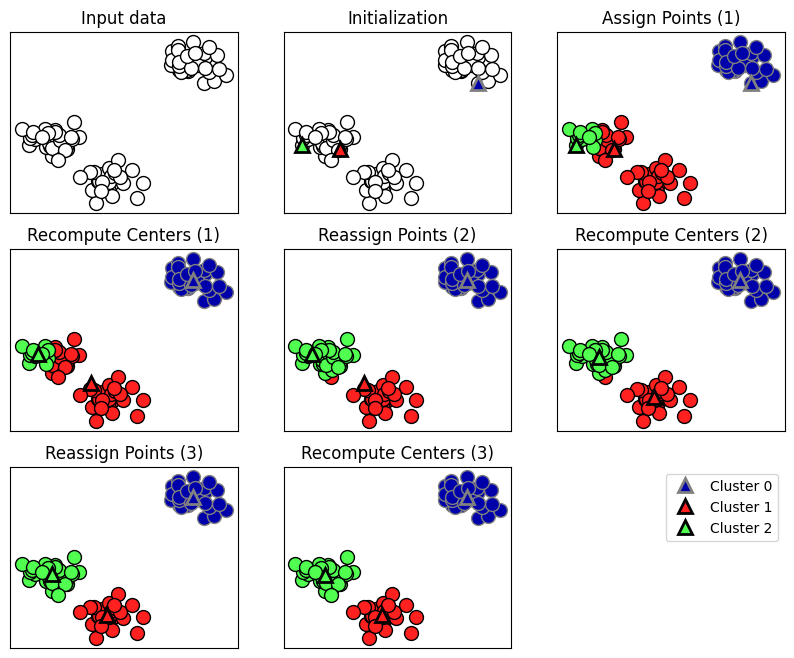

In [2]:
%matplotlib inline
# L'algo en k-moyenne essaye de trouver des centres de cluster pour des régions de données.
# Déroulé : 
# - affecter chaque point au centre le plus proche
# - définir chaque centre comme la moyenne des points qui lui sont affectées
# - recommence jusque convergence atteinte
import mglearn
mglearn.plots.plot_kmeans_algorithm()

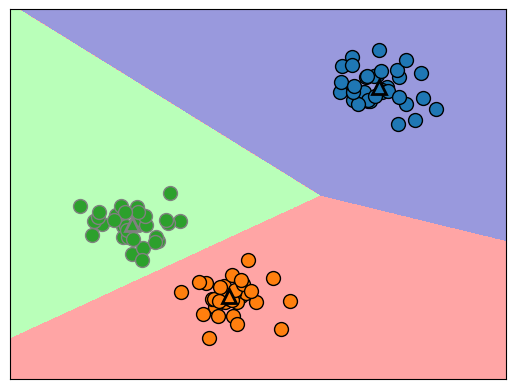

In [4]:
# Pour chaque nouveau point de donnée, celui-ci va être assigné au centre du cluster le plus proche
mglearn.plots.plot_kmeans_boundaries()

# Dessin de la surface d'assignation

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

print(X.shape)

(100, 2)


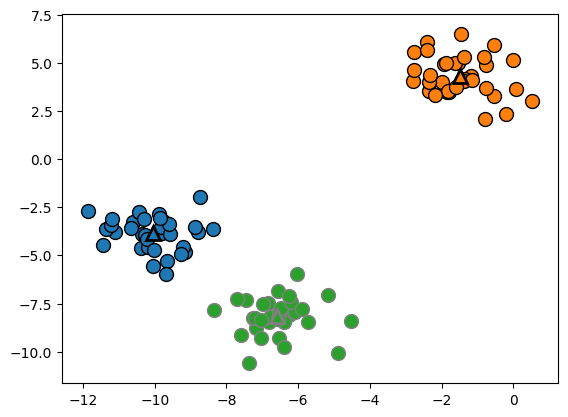

In [10]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^', markeredgewidth=2)
# L'algo est aveugle et se contente de construire des bin
# On obtient autant de clusters que ce qu'on demande

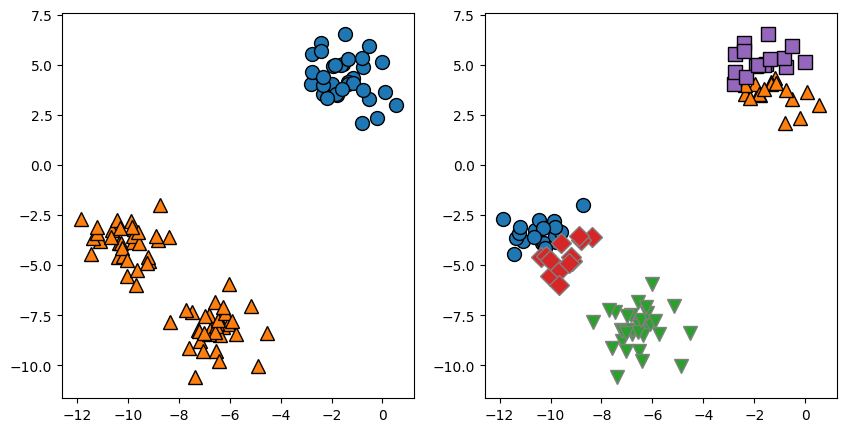

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(10,5))

kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

kmeans = KMeans(n_clusters=5,n_init=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

# Il est donc difficile de trouver un sens particulier aux clusters

Text(0, 0.5, 'Paramètre 2')

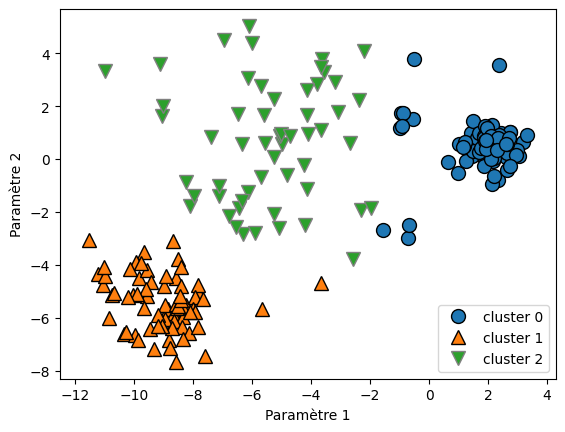

In [21]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0,2.5,0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3,n_init=10, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"])
plt.xlabel("Paramètre 1")
plt.ylabel("Paramètre 2")

# Même en connaissant le bon nombre de cluster, on peut avoir un partitionnement exotique : par définition 
# les clusters doivent être simple ( convexité des clusters )

Text(0, 0.5, 'Paramètre 2')

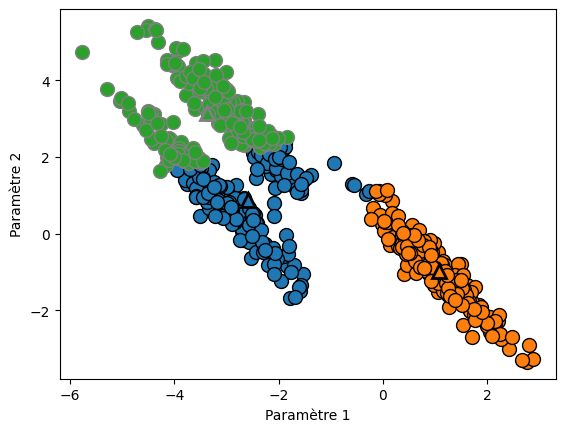

In [23]:
import numpy as np

X,y = make_blobs(random_state=170,n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^', markeredgewidth=2)
plt.xlabel("Paramètre 1")
plt.ylabel("Paramètre 2")

Text(0, 0.5, 'Paramètre 2')

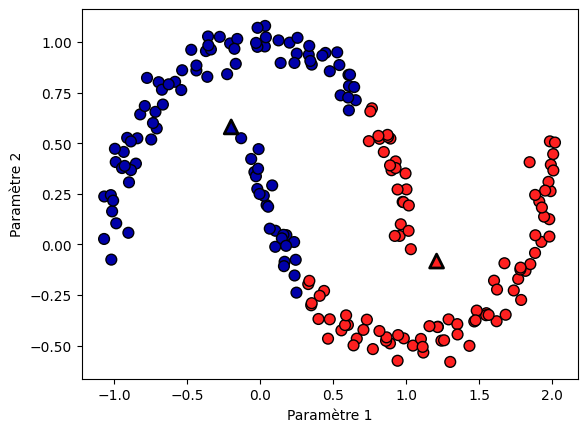

In [30]:
from sklearn.datasets import make_moons

X,y = make_moons(random_state=0,n_samples=200,noise=0.05)

kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolor='k')
plt.xlabel("Paramètre 1")
plt.ylabel("Paramètre 2")

# Pour des clusters complexes : 

Text(0, 0.5, 'nmf')

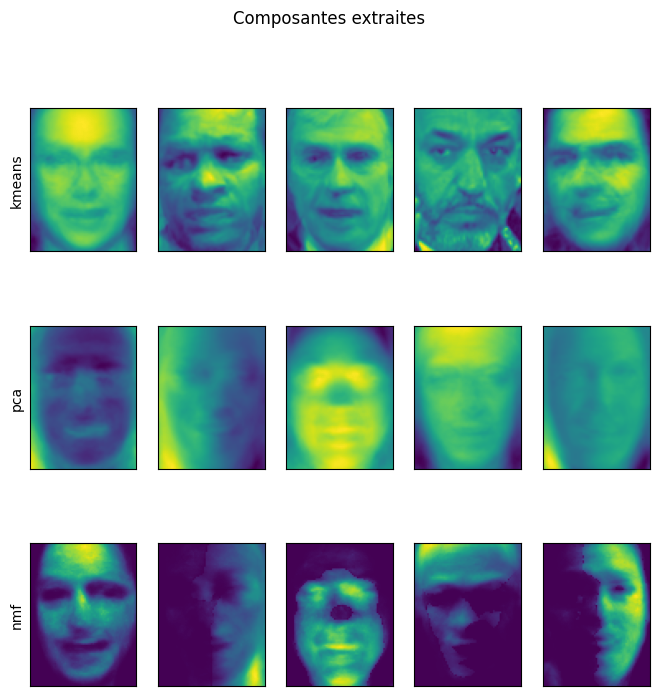

In [42]:
# L'association d'un ensemble de données à un son centre de cluster est une méthode de quantification vectorielle.
# https://fr.wikipedia.org/wiki/Quantification_vectorielle

# Comparaison des 3 méthodes de décomposition sur le jeu people

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF,PCA

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1 

X_people = people.data[mask]
y_people = people.target[mask]
image_shape = people.images[0].shape

X_train,X_test,y_train,y_test = train_test_split( X_people, y_people, stratify=y_people, random_state=10)

nmf = NMF(n_components=100, random_state=0, solver='mu',max_iter=300)
nmf.fit(X_train)
pca = PCA(n_components=100,random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0,n_init=10)
kmeans.fit(X_train)

# Composantes extraites

fig,axes = plt.subplots(3,5,figsize=(8,8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Composantes extraites")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")



Text(0, 0.5, 'nmf')

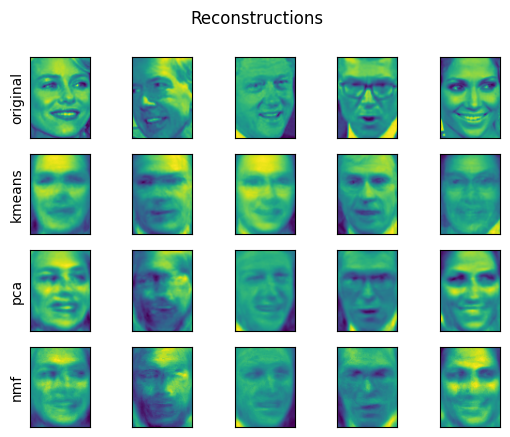

In [44]:
# Reconstructions

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

fig, axes = plt.subplots(4,5, subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Reconstructions")
for ax,orig, rec_kmeans, rec_pca, rec_nmf in zip( 
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,X_reconstructed_nmf):
        ax[0].imshow(orig.reshape(image_shape))
        ax[1].imshow(rec_kmeans.reshape(image_shape))
        ax[2].imshow(rec_pca.reshape(image_shape))
        ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

Text(0, 0.5, 'Caractéristique 2')

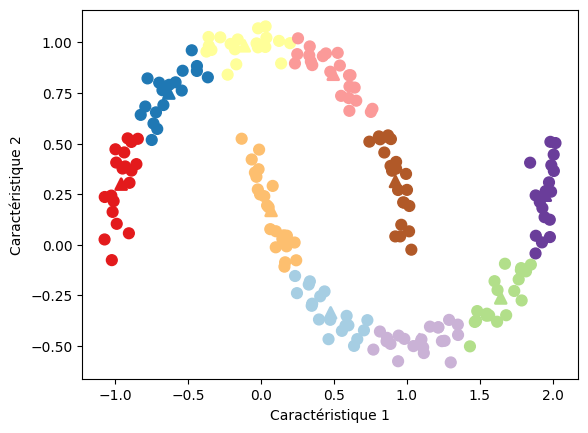

In [47]:
# Contrairement aux méthodes de décomposition PCA ou NMF, il est possible d'augmenter le nombre de caractéristiques
# recherchées pour trouver un représentation plus expressive

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^',
            c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")